# CESM Control vs Forcing Runs

How appropriate is it to use the control run as a climatology

In [1]:
#import my functions
import sys
sys.path.append('../')

import utils._modelDefinitions as _model


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import scipy.stats

%matplotlib inline

In [3]:
# Here is the data
indecesXr = xarray.open_dataset('../results/cesmTradIndeces.nc')

indecesXr.experiment.values

array(['LME.002', 'LME.003', 'LME.008', 'LME.009', '0850cntl.001', '001',
       '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013'], dtype=object)

In [4]:
indecesXr

<xarray.Dataset>
Dimensions:          (experiment: 18, year: 1250)
Coordinates:
  * year             (year) int64 850 851 852 853 854 ... 2096 2097 2098 2099
  * experiment       (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Data variables:
    dmi              (experiment, year) float64 ...
    eastIO           (experiment, year) float64 ...
    nino34NoDetrend  (experiment, year) float64 ...
    nino34           (experiment, year) float64 ...
    sam              (experiment, year) float64 ...
    nino4NoDetrend   (experiment, year) float64 ...
    nino4            (experiment, year) float64 ...
    eastIONoDetrend  (experiment, year) float64 ...
Attributes:
    nino34NoDetrend:  [ 7 15]
    nino4NoDetrend:   [ 7 15]
    eastIONoDetrend:  [ 7 12]
    dmi:              [ 7 12]
    nino34:           [ 7 15]
    nino4:            [ 7 15]
    eastIO:           [ 7 12]
    sam:              [10 15]
    lat1:             [10 15]
    lat2:             [10 15]
    precAnom:         [ 9 15]
    tsAnom:           [ 9 15]

In [165]:
indecesXr['sam'].values.flatten()

array([-1.05913781,  0.27259859,  0.24537125, ...,         nan,
               nan,         nan])

In [220]:
def chi2Index(indecesXr):
    
    # This should calculate stds for all indeces
    stdXr = indecesXr.sel(experiment=_model.cesmCntl).std(dim='year')
    
    for iIndex in list(indecesXr.data_vars):
    
        print(iIndex)

        std=stdXr[iIndex]
        bins=numpy.arange(-2*std, 2.1*std, 0.25*std)
        
        plt.figure()

        cntlHist = indecesXr[iIndex].sel(
            experiment=_model.cesmCntl, year=slice(850,1849)
                 ).plot.hist(bins=9)

        plt.show()

        plt.figure()

        meanHist = indecesXr[iIndex].sel(
            experiment=_model.cesmFullForcings, year=slice(850,1849)
                     ).plot.hist(bins=cntlHist[1])

        plt.show()

        cntlHist[0]/cntlHist[0].sum()

        meanHist[0]/meanHist[0].sum()

        print(
            scipy.stats.f_oneway(indecesXr[iIndex].sel(
                experiment=_model.cesmCntl, year=slice(850,1849)
            ).values.flatten(), 
                                 indecesXr[iIndex].sel(
            experiment=_model.cesmFullForcings, year=slice(850,1849)
                                 ).values.flatten()
                     )
        )
        

dmi


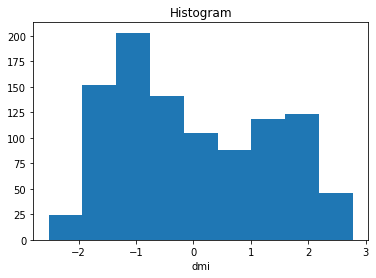

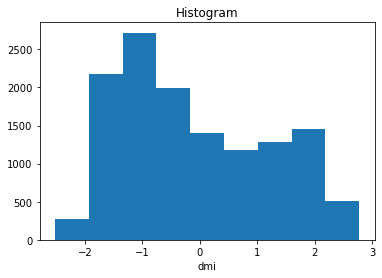

F_onewayResult(statistic=4.273439209084943, pvalue=0.038730839719232496)
nino34


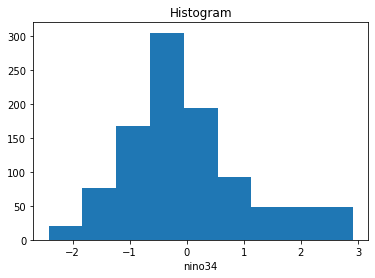

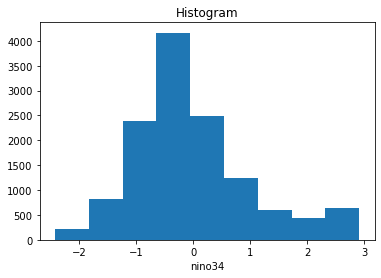

F_onewayResult(statistic=0.6931987155334439, pvalue=0.40509270960520516)
sam


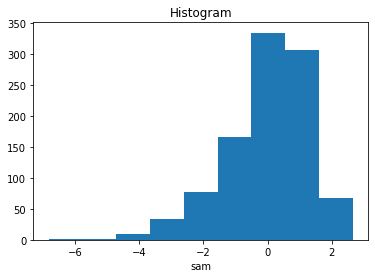

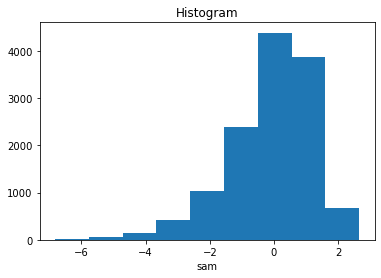

F_onewayResult(statistic=3.0338907065804057, pvalue=0.08156423290606128)


In [221]:
chi2Index(indecesXr[['dmi', 'nino34', 'sam']])

And again for the compounds

In [208]:
#The data
firePos=xarray.open_dataset('../results/cesmFirePos.nc')
fireNeg=xarray.open_dataset('../results/cesmFireNeg.nc')

In [216]:
def chi2Event(xr, x):

    firePosSum = xr.sel(year=slice(850,1850)).to_array().sum(dim=['year'])
    
    cntl=firePosSum.sel(variable=x).sel(
        experiment=_model.cesmCntl).values
    fullForcing=firePosSum.sel(variable=x).sel(
        experiment=_model.cesmFullForcings).sum(dim='experiment')/13

    plt.bar(x, cntl, 
            align='edge', width=-.3, label='cntl'
           )


    plt.bar(x, fullForcing, 
            align='edge', width=0.3, label='fullForcing'
           )

    plt.legend()

    print( scipy.stats.chisquare(cntl, f_exp=fullForcing ) )


Power_divergenceResult(statistic=3.4606427306260956, pvalue=0.17722744606357144)


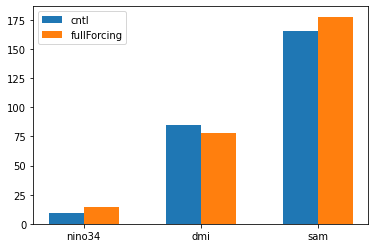

In [217]:
chi2Event(firePos, [*firePos.indeces]) #, *firePos.pairs, 'all3'])

Power_divergenceResult(statistic=13.546330306564343, pvalue=0.00114406776426417)


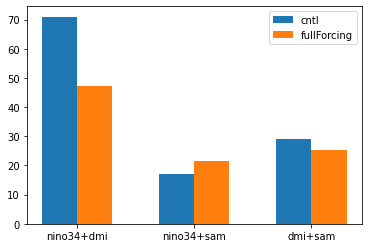

In [218]:
chi2Event(firePos, [*firePos.pairs])

Power_divergenceResult(statistic=7.750816020208709, pvalue=0.25693350472441395)


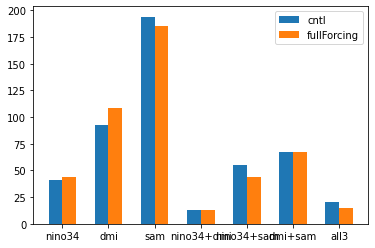

In [219]:
chi2Event(fireNeg, [*fireNeg.indeces, *fireNeg.pairs, 'all3'])